In [6]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("harshvardhan21/sign-language-detection-using-images")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Marsel\.cache\kagglehub\datasets\harshvardhan21\sign-language-detection-using-images\versions\1


In [7]:
import torch
import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import cv2
import mediapipe as mp


In [8]:
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

In [9]:
def landmarks_to_features(hand_landmarks):
    """Generate a feature vector from hand landmarks.

    Args:
        hand_landmarks (HandLandmark): The hand landmarks.

    Returns:
        np.ndarray: The feature vector of size (42,).
    """
    coords = np.array([[lm.x, lm.y] for lm in hand_landmarks.landmark])
    
    return coords.flatten()  # shape (42,)

def preprocess_image(image_path):
    """Preprocess the image for hand tracking and return landmark features."""
    # Load and convert image
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError(f"Image not found at {image_path}")
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    features_list = []

    with mp_hands.Hands(
        static_image_mode=True,
        max_num_hands=2,
        min_detection_confidence=0.5
    ) as hands:
        results = hands.process(image_rgb)

        if not results.multi_hand_landmarks:
            return features_list  # no hands detected

        for hand_landmarks in results.multi_hand_landmarks:
            # Convert landmarks to features
            features = landmarks_to_features(hand_landmarks)
            features_list.append(features)

            # Optional: Draw landmarks for visualization
            # annotated_image = image.copy()
            # mp_drawing.draw_landmarks(
            #     annotated_image,
            #     hand_landmarks,
            #     mp_hands.HAND_CONNECTIONS,
            #     mp_drawing_styles.get_default_hand_landmarks_style(),
            #     mp_drawing_styles.get_default_hand_connections_style()
            # )
            # You can save the annotated image if you want
            # cv2.imwrite('./annotated_image.png', annotated_image)

    return features_list

In [10]:
LABELS = [
    '1', '2', '3', '4', '5', '6', '7', '8', '9',
    'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 
    'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R',
    'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'
]

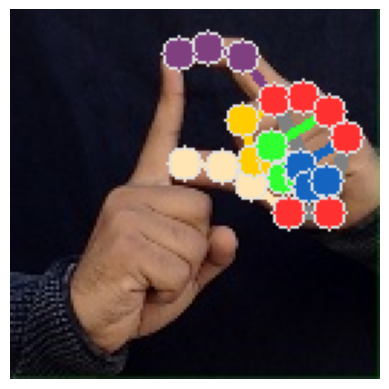

(array([0.46486783, 0.88021755, 0.37187046, 0.80111384, 0.35721913,
        0.67185575, 0.462136  , 0.57673252, 0.56006199, 0.50906169,
        0.37027201, 0.46118167, 0.33700991, 0.28387481, 0.32101363,
        0.17080979, 0.31077239, 0.07967344, 0.47656837, 0.46477094,
        0.51491487, 0.26987597, 0.53264832, 0.15295632, 0.54895246,
        0.05558944, 0.5579527 , 0.52041709, 0.61429369, 0.40176585,
        0.5654434 , 0.48015636, 0.52909404, 0.54431927, 0.61991626,
        0.60288501, 0.63744015, 0.52059597, 0.58359581, 0.5742594 ,
        0.54141128, 0.62858528]),
 (42,))

In [11]:
feature = preprocess_image(path + "/data/2/0.jpg")[0]

img = cv2.imread("annotated_image.png")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

feature, feature.shape

In [14]:
all_features = []

for label in LABELS:
    print(f"Processing label: {label}")
    for i in range(1201):
        try:
            features_list = preprocess_image(f"{path}/data/{label}/{i}.jpg")
            if not features_list:
                continue  # no hands detected
            feature = features_list[0]  # take the first hand
            # Append feature vector + label
            all_features.append(np.append(feature, label))
        except Exception as e:
            # Skip missing files or errors
            continue

# Create DataFrame
columns = [f"f{j}" for j in range(42)] + ["label"]
features_df = pd.DataFrame(all_features, columns=columns)
features_df.to_csv("hand_landmarks_features.csv", index=False)

features_df.head()

Processing label: 1
Processing label: 2
Processing label: 3
Processing label: 4
Processing label: 5
Processing label: 6
Processing label: 7
Processing label: 8
Processing label: 9
Processing label: A
Processing label: B
Processing label: C
Processing label: D
Processing label: E
Processing label: F
Processing label: G
Processing label: H
Processing label: I
Processing label: J
Processing label: K
Processing label: L
Processing label: M
Processing label: N
Processing label: O
Processing label: P
Processing label: Q
Processing label: R
Processing label: S
Processing label: T
Processing label: U
Processing label: V
Processing label: W
Processing label: X
Processing label: Y
Processing label: Z


,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f33,f34,f35,f36,f37,f38,f39,f40,f41,label
0,0.47862714529037476,0.8581335544586182,0.40246665477752686,0.7889454960823059,0.36396926641464233,0.6755009293556213,0.4164540767669678,0.5881205797195435,0.49958327412605286,0.5404021739959717,...,0.7012316584587097,0.6637173295021057,0.6653105020523071,0.6693123579025269,0.6271687150001526,0.6046708822250366,0.7028237581253052,0.5765179991722107,0.7321912050247192,1
1,0.47506099939346313,0.8617334365844727,0.3995116949081421,0.7889955043792725,0.3632256090641022,0.6735125184059143,0.41868138313293457,0.5864988565444946,0.49934130907058716,0.5398273468017578,...,0.6988345980644226,0.6615326404571533,0.66496342420578,0.6651405692100525,0.6284939646720886,0.6015529632568359,0.7060903310775757,0.5780611634254456,0.7329648733139038,1
2,0.4789178967475891,0.8576290011405945,0.40225398540496826,0.7881780862808228,0.3613407611846924,0.6734580397605896,0.41607630252838135,0.5862129330635071,0.4996071457862854,0.5408321619033813,...,0.7004384994506836,0.6631035804748535,0.6641312837600708,0.6666542291641235,0.6288995146751404,0.6035000085830688,0.7053472995758057,0.5788191556930542,0.7326253652572632,1
3,0.477274090051651,0.8625816702842712,0.3992616534233093,0.7869450449943542,0.36119556427001953,0.6700425148010254,0.4166620969772339,0.5839149355888367,0.5013719797134399,0.5423057675361633,...,0.700455367565155,0.662800669670105,0.6642900109291077,0.6666533946990967,0.628260612487793,0.6021718382835388,0.7048177719116211,0.5772062540054321,0.7333190441131592,1
4,0.4789413809776306,0.8616394996643066,0.40062808990478516,0.7891255617141724,0.3622884154319763,0.6714432835578918,0.41840776801109314,0.583975076675415,0.5031071901321411,0.5429856181144714,...,0.7024126648902893,0.6635717153549194,0.6647459268569946,0.66750168800354,0.6286520957946777,0.6035861372947693,0.7052909731864929,0.5794686675071716,0.7335330247879028,1
